<a href="https://colab.research.google.com/github/Hugo904-hub/IAyRN2024_1977112/blob/main/RNA_Prealimentada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Hugo Andriy Sánchez Ramírez;

Matrícula: 1977112    Carrera:IMTC

Hora clase: N4   Inteligencia Artificial y Redes Neuronales





Repaso rapido de un programa completo de Tensorflow con los detalles explicados a medida que avanza. De un conjunto de datos que contiene imágenes de baja resolución de digitos del 0 al 9. El conjunto es parte de la librería de Keras.

In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


Importar el set de datos de digitos de MNIST.

In [2]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Al cargar el set de datos retorna cuatro arreglos en NumPy:

El arreglo train_images y train_labels son los arreglos que training set—el modelo de datos usa para aprender.
el modelo es probado contra los arreglos test set, el test_images, y test_labels.

In [3]:
class_names = ['cero', 'uno', 'dos', 'tres', 'cuatro',
               'cinco', 'seis', 'siete', 'ocho', 'nueve']

Explore el set de datos
Explore el formato de el set de datos antes de entrenar el modelo. Lo siguiente muestra que hay 60,000 imagenes en el set de entrenamiento, con cada imagen representada por pixeles de 28x28:

In [4]:
train_images.shape


(60000, 28, 28)

Asimismo, hay 60,000 etiquetas en el set de entrenamiento:

In [5]:
len(train_labels)


60000

In [6]:
train_labels


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Hay 10,000 imagenes en el set de pruebas. Otra vez, cada imagen es representada como pixeles de 28x28:

In [7]:
test_images.shape


(10000, 28, 28)

Y el set de pruebas contiene 10,000 etiquetas de imagen:

In [8]:
len(test_labels)


10000

Pre-procesamiento set de datos
El set de datos debe ser pre-procesada antes de entrenar la red. Si usted inspecciona la primera imagen en el set de entrenamiento, va a encontrar que los valores de los pixeles estan entre 0 y 255:

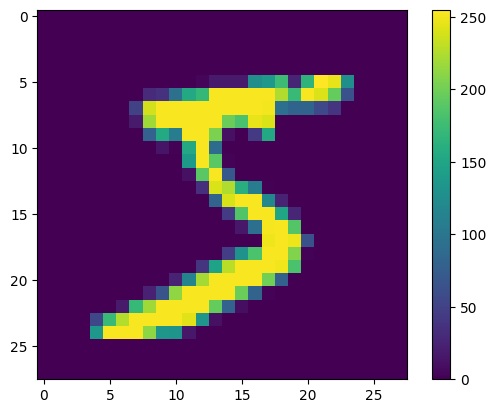

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el training set y despleguemos el nombre de cada clase debajo de cada imagen.

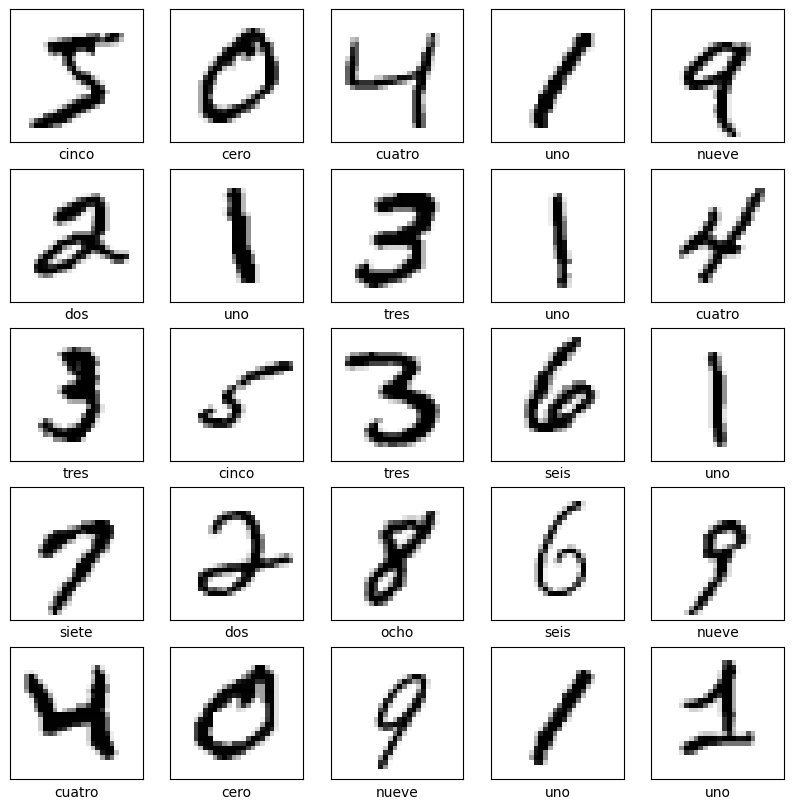

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


Construir el Modelo.

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

Configurar las Capas
Los bloques de construccion basicos de una red neuronal son las capas o layers. Las capas extraen representaciones de el set de datos que se les alimentan. Con suerte, estas representaciones son considerables para el problema que estamos solucionando.

La mayoria de aprendizaje profundo consiste de unir capas sencillas. La mayoria de las capas como tf.keras.layers.Dense, tienen parametros que son aprendidos durante el entrenamiento.

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Entrenar el Modelo.

Entrenar el modelo de red neuronal requiere de los siguientes pasos:

1. Entregue los datos de entrenamiento al modelo. En este ejemplo , el set de datos de entrenamiento estan en los arreglos train_images y train_labels.
el modelo aprende a asociar imagenes y etiquetas.
2. Usted le pregunta al modelo que haga predicciones sobre un set de datos que se encuentran en el ejemplo,incluido en el arreglo test_images.
3. Verifique que las predicciones sean iguales a las etiquetas de el arreglotest_labels.
Para comenzar a entrenar, llame el metodo model.fit, es llamado asi por que fit (ajusta) el modelo a el set de datos de entrenamiento:

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2628 - accuracy: 0.9244
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1162 - accuracy: 0.9657
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0802 - accuracy: 0.9756
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0596 - accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0460 - accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0373 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0286 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0241 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0204 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.015

A medida que el modelo entrena, la perdida y la exactitud son desplegadas. Este modelo alcanza una exactitud de 0.97 (o 97%) sobre el set de datos de entrenamiento.

Evaluar Exactitud
Siguiente, compare como el rendimiento del modelo sobre el set de datos:

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0886 - accuracy: 0.9772 - 630ms/epoch - 2ms/step

Test accuracy: 0.9771999716758728


Hacer predicciones
Con el modelo entrenado usted puede usarlo para hacer predicciones sobre imagenes.

In [16]:
predictions = model.predict(test_images)


313/313 [==============================] - 1s 2ms/step


In [17]:
predictions[0]

array([4.88278307e-09, 1.30525625e-11, 9.93495863e-09, 1.84883004e-06,
       5.07567765e-15, 2.81984713e-10, 1.14257375e-15, 9.99997914e-01,
       8.90942786e-09, 8.25014723e-08], dtype=float32)

In [19]:
np.argmax(predictions[0])

7

In [20]:
test_labels[0]


7